Jeanette Walangitan

In [16]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from textblob import TextBlob # TextBlob tidak diperlukan, jadi di-comment

# --- PERSIAPAN DAFTAR STOPWORD BAHASA INDONESIA ---
try:
    # Coba gunakan stopword dari NLTK
    list_stopwords = set(stopwords.words('indonesian'))
except:
    # Fallback ke daftar manual yang umum (sudah diperluas dari diskusi sebelumnya)
    print("❌ Stopword 'indonesian' NLTK tidak ditemukan. Menggunakan daftar stopword umum.")
    list_stopwords = [
        "yang", "untuk", "pada", "ke", "para", "namun", "menurut", "tetapi", "agar",
        "dengan", "demikian", "adalah", "dan", "di", "dari", "ini", "itu", "atau",
        "pun", "juga", "sebagai", "seperti", "juga", "hal", "saat", "yaitu", "karena",
        "tersebut", "oleh", "serta", "guna", "tapi", "kan", "deh", "kok", "cuma",
        "ada", "aku", "saya", "kami", "mereka", "ia", "dia", "mu", "ku", "nya", "eh",
        "sy", "sama", "dia", "kamu", "bgt", "orang", "jirayut halda",
        "bunda maya", " bunda maia", "halda jirayut", "banget", ", saja", "sampai",
        "bisa", "halda", "jirayut", "bunda", "anak", "maia", "jadi", "sudah", "kalau", "saja", "apa", "sih", "lagi", "terus", "buat", "hanya",
    "sendiri", "mau", "iya", "dani", "dhani", "kakak", "abang", "abang densu", "ahmad dhani",
        "ahmad dani", "mas dani", "mas dhani", "kakak vidi", "ded kakak vidi",
        "densu", "mas", "vidi", "ded", "vidi", "semua", "sekarang", "dong", "harus", "bikin", "dulu", "akan", "pasti",
    "punya", "tahu", "salah", "banyak", "ingin", "karena", "lalu", "masih",
    "lah", "kembali", "kita", "menonton", "benar", "selalu", "lebih", "merasa", "kadang", "kok", "lagi",
    "bukan", "podcast", "emang", "kenapa", "maya", "ahmad", "suami", "isteri", "malah", "begini", "begitu", "pernah", "kali", "terima", "kasih",
    "bilang", "capek", "ambil", "paling", "mana", "tau", "satu", "diri",
    "saat", "mungkin", "sangat", "baru", "liat", "rumah", "mulut",
    "pak", "pakde", "dedy", "komentar", "istri", "suami", "anaknya", "selingkuh", "href",'amp'
    "kalian", "teman", "the", "pas", "netizen", "mulan", "kalian", "podhub"
    ]
    # Beberapa kata seperti 'tidak', 'banget', 'haha' TIDAK dimasukkan agar sentimen tetap terjaga.
    list_stopwords = set(list_stopwords)


# === 1. Kamus slang Indonesia ===
slang_dict = {
    # ===== Negasi & Kata Umum =====
    'gk': 'tidak', 'ga': 'tidak', 'ngga': 'tidak', 'gak': 'tidak', 'kagak': 'tidak',
    'tdk': 'tidak', 'engga': 'tidak', 'ndak': 'tidak', 'nda': 'tidak', 'g': 'tidak',
    'tak': 'tidak', 'ngk': 'tidak', 'gkz': 'tidak', 'gakk': 'tidak',
    'gapapa': 'tidak apa apa', 'gapape': 'tidak apa apa', 'gpp': 'tidak apa apa',
    'gaada': 'tidak ada', 'gkada': 'tidak ada', 'gakada': 'tidak ada',
    'gausah': 'tidak usah', 'gusah': 'tidak usah', 'gaperlu': 'tidak perlu',
    'gtw': 'tidak tahu', 'gatau': 'tidak tahu', 'gatw': 'tidak tahu', 'gtao': 'tidak tahu',
    'idk': 'tidak tahu',
    'idc': 'tidak peduli',
    'bodoamat': 'cuek', 'bodo': 'bodoh',

    # ===== Intensitas & Emosi =====
    'bgt': 'banget', 'bngt': 'banget', 'bgtt': 'banget', 'bget': 'banget',
    'bangett': 'banget', 'bangettt': 'banget', 'bangeet': 'banget', 'bnget': 'banget',
    'bangeeet': 'banget', 'bangetttt': 'banget', 'bgttt': 'banget', 'bgtsss': 'banget',
    'parahh': 'parah', 'parahhh': 'parah', 'sngt': 'sangat',
    'beneran': 'benar', 'bener2': 'benar benar', 'seru2': 'seru banget',
    'terharuu': 'terharu', 'terharuuu': 'terharu', 'merindingg': 'merinding',
    'merindinggg': 'merinding', 'nangiss': 'nangis', 'nangisss': 'nangis', 'nangissss': 'nangis',
    'capekk': 'capek', 'capekkk': 'capek', 'capee': 'capek', 'capeee': 'capek',
    'sedihh': 'sedih', 'seneng': 'senang', 'senengg': 'senang',
    'bahagiaa': 'bahagia', 'sumpahh': 'sumpah', 'sumpaah': 'sumpah',
    'semangatt': 'semangat', 'semangattt': 'semangat', 'down': 'terpuruk',
    'benerann': 'benar', 'benerannn': 'benar', 'benerannnn': 'benar', 'bener': 'benar',
    'bner': 'benar', 'benern': 'benar',
    'seremm': 'seram', 'seremmm': 'seram', 'serem banget': 'seram sekali',
    'gilak': 'gila', 'gile': 'gila', 'gilaaa': 'gila', 'gillaa': 'gila',
    'ngeriih': 'ngeri', 'ngeriihh': 'ngeri', 'ngeriihhh': 'ngeri',
    'ngeri banget': 'ngeri sekali', 'takutt': 'takut', 'takuttt': 'takut',
    'sad': 'sedih', 'happy': 'bahagia', 'huhu': 'sedih',

    # ===== Waktu & Urutan =====
    'udh': 'sudah', 'udah': 'sudah', 'sdh': 'sudah', 'dah': 'sudah', 'udahh': 'sudah',
    'blm': 'belum', 'belom': 'belum',
    'dlu': 'dulu', 'dl': 'dulu', 'dlh': 'dulu', 'dluu': 'dulu',
    'skrg': 'sekarang', 'skg': 'sekarang', 'skrng': 'sekarang',
    'td': 'tadi', 'tad': 'tadi', 'tdi': 'tadi',
    'trs': 'terus', 'trus': 'terus',
    'nnti': 'nanti', 'ntar': 'nanti', 'nt': 'nanti',
    'ampe': 'sampai', 'mpe': 'sampai', 'sampe': 'sampai',
    'skalian': 'sekalian', 'abis': 'habis',
    'nextt': 'selanjutnya',

    # ===== Kata Sambung =====
    'tp': 'tapi', 'tpi': 'tapi', 'tpn': 'tapi',
    'pdhl': 'padahal',
    'krn': 'karena', 'krena': 'karena', 'soalnya': 'karena', 'soale': 'karena',
    'bcs': 'karena', 'bcuz': 'karena', 'cuz': 'karena', 'cus': 'karena',
    'sm': 'sama', 'ama': 'sama', 'sma': 'sama',
    'dgn': 'dengan', 'dg': 'dengan',
    'dr': 'dari', 'yg': 'yang', 'ny': 'nya',
    'biar': 'agar',
    'klo': 'kalau', 'kl': 'kalau', 'klu': 'kalau', 'klw': 'kalau', 'kalo': 'kalau',
    'ko': 'kok', 'loh': 'kok',
    'mlh': 'malah',
    'trnyta': 'ternyata', 'nyata': 'ternyata', 'nyatanya': 'ternyata',

    # ===== Pronomina & Panggilan =====
    'aku': 'saya', 'aq': 'saya', 'sy': 'saya', 'q': 'saya', 'ak': 'saya',
    'akuu': 'saya', 'akuuu': 'saya', 'akuuuu': 'saya', 'akuuuuu': 'saya',
    'gw': 'aku', 'gua': 'aku', 'gue': 'aku', 'gwe': 'aku',
    'lu': 'kamu', 'loe': 'kamu', 'lo': 'kamu', 'elo': 'kamu', 'elu': 'kamu', 'u': 'kamu', 'ur': 'kamu',
    'km': 'kamu', 'kmu': 'kamu',
    'kaliann': 'kalian', 'klian': 'kalian',
    'bang': 'abang', 'bangg': 'abang', 'banggg': 'abang', 'ngab': 'abang',
    'kak': 'kakak', 'kaka': 'kakak', 'ka': 'kakak', 'kk': 'kakak',
    'bro': 'teman', 'coy': 'teman', 'cuy': 'teman', 'coeg': 'teman', 'ges': 'teman',
    'guys': 'teman teman', 'sob': 'sobat', 'bestie': 'teman baik',

    # ===== Penunjuk / Kata Bantu =====
    'aj': 'saja', 'aja': 'saja', 'doang': 'saja', 'cuma': 'hanya',
    'ni': 'ini', 'nih': 'ini', 'nie': 'ini', 'nii': 'ini',
    'tu': 'itu', 'tuh': 'itu', 'ituu': 'itu', 'ituh': 'itu',
    'gitu': 'begitu', 'gini': 'begini', 'ginii': 'begini', 'gituu': 'begitu',
    'gituuu': 'begitu', 'gittuu': 'begitu', 'gituan': 'seperti itu',
    'bgtu': 'begitu', 'bgtuh': 'begitu',

    # ===== Ekspresi Umum (Interjeksi/Seruan) =====
    'anjir': 'astaga', 'anjay': 'astaga', 'anj': 'astaga', 'anjrit': 'astaga',
    'anjirr': 'astaga', 'anjirrr': 'astaga', 'anjirrrr': 'astaga', 'anjg': 'astaga',
    'anjgg': 'astaga', 'anjirrk': 'astaga', 'anjr': 'astaga', 'anjrot': 'astaga',
    'anjayy': 'astaga', 'anjayyy': 'astaga', 'anjrtt': 'astaga', 'anjggg': 'astaga',
    'anjingg': 'astaga', 'anjgk': 'astaga', 'anjrr': 'astaga', 'anjrrt': 'astaga',
    'anjjr': 'astaga', 'anjasmara': 'astaga',
    'astagfirullah': 'astaghfirullah', 'astaga': 'astaghfirullah',
    'yaallah': 'ya allah', 'yaallahh': 'ya allah', 'yaallahhh': 'ya allah', 'yaallahhhh': 'ya allah',
    'yaampun': 'ya ampun', 'yaampunn': 'ya ampun', 'yaampunnn': 'ya ampun',
    'yaampunnnn': 'ya ampun', 'yaampuun': 'ya ampun', 'ampun': 'ya ampun', 'ampunndeh': 'ya ampun',
    'masyaallah': 'masya allah', 'masyaallahh': 'masya allah',
    'subhanallah': 'subhanallah',
    'duh': 'aduh', 'huh': 'aduh', 'lahh': 'lah', 'lah': 'lah', 'aww': 'gemas', 'wow': 'wah',
    'yahh': 'yah', 'omg': 'ya tuhan', 'smh': 'geleng geleng',

    # ===== Tawa / Ekspresi Lucu =====
    'wkwk': 'haha', 'wkwkwk': 'haha', 'wk': 'haha', 'wkwkwkwk': 'haha',
    'wkwwkwk': 'haha', 'wkwwkkw': 'haha', 'wkwkwkwkwk': 'haha', 'lmao': 'haha',
    'hehe': 'haha', 'hihi': 'haha', 'haha': 'haha', 'hahahaha': 'haha',
    'hahaa': 'haha', 'hehehe': 'haha', 'hehehh': 'haha', 'xixi': 'haha',
    'ngakak': 'haha', 'ngakakk': 'haha', 'ngakakkk': 'haha', 'wkakkaka': 'haha',
    'wkwkwkwkwkwk': 'haha', 'kwkwkw': 'haha', 'wkwwk': 'haha', 'wkakwk': 'haha',
    'wkwkwkwkwkwkwk': 'haha', 'wkakak': 'haha', 'wkakaka': 'haha', 'wakaka': 'haha',
    'wkkwkwk': 'haha', 'kwkwkwk': 'haha', 'kwk': 'haha', 'xixixi': 'haha',
    'ckck': 'aduh', 'ckckck': 'aduh', 'hadeh': 'aduh', 'hadehh': 'aduh',
    'pecah': 'lucu banget', 'pecaah': 'lucu banget',
    'kocakk': 'lucu', 'kocakkk': 'lucu', 'kocakkkk': 'lucu',

    # ===== Serapan / Singkatan Umum =====
    'pls': 'tolong', 'plis': 'tolong', 'pliss': 'tolong', 'plisss': 'tolong',
    'plissss': 'tolong', 'plsdehh': 'tolong deh', 'plsdeh': 'tolong deh', 'plsss': 'tolong',
    'plsbgt': 'tolong banget', 'plsbgtt': 'tolong banget', 'tlg': 'tolong',
    'btw': 'ngomong ngomong', 'imo': 'menurut saya',
    'rip': 'istirahat dalam damai', 'samawa': 'sakinah mawaddah warahmah',
    'thx': 'terima kasih', 'tq': 'terima kasih', 'makasih': 'terima kasih',
    'makasi': 'terima kasih', 'makasiih': 'terima kasih', 'makasii': 'terima kasih',
    'mksih': 'terima kasih', 'mks': 'terima kasih', 'thanks': 'terima kasih',
    'ty': 'terima kasih', 'thnks': 'terima kasih', 'tnx': 'terima kasih',
    'thankyou': 'terima kasih', 'thanku': 'terima kasih', 'makasiiih': 'terima kasih',
    'makasiiihh': 'terima kasih', 'mntap ':'mantap', 'salfok': 'salah fokus', 'hapy':'happy', 'cung':'angkat tangan',

    # ===== Bahasa Campur Inggris =====
    'r': 'adalah', 'ya': 'iya', 'y': 'iya',
    'ok': 'oke', 'okay': 'oke', 'okey': 'oke', 'okeey': 'oke', 'okeee': 'oke',
    'ofc': 'tentu', 'relate': 'terkait', 'insecure': 'minder',
    'feeling': 'perasaan', 'story': 'cerita', 'sound': 'suara',
    'backsound': 'latar suara', 'goodlooking': 'menarik',
    'support': 'dukung', 'fyp': 'viral', 'vibes': 'suasana', 'chill': 'santai',
    'random': 'acak', 'content': 'konten', 'epic': 'keren',
    'worst': 'terburuk', 'relate banget': 'terkait sekali', 'cringe': 'aneh',

    # ===== Singkatan Internet & Umum Netizen =====
    'gmna': 'bagaimana', 'gmn': 'bagaimana', 'gmnuh': 'bagaimana', 'gimna': 'bagaimana',
    'brb': 'segera kembali', 'ily': 'aku cinta kamu', 'ilysm': 'aku sangat cinta kamu',
    'lvyu': 'aku cinta kamu', 'luv': 'cinta', 'lv': 'cinta',
    'bt': 'bad mood', 'gabut': 'tidak ada kerjaan', 'mager': 'malas gerak',
    'gemess': 'gemas', 'gemesss': 'gemas', 'gemessss': 'gemas', 'lucuu': 'lucu', 'lucuuu': 'lucu',
    'mantul': 'mantap betul', 'mantapp': 'mantap', 'mantep': 'mantap',
    'mantepp': 'mantap', 'mantulll': 'mantap', 'kereenn': 'keren',
    'kereeen': 'keren', 'kiyut': 'imut', 'kyut': 'imut', 'kiyuut': 'imut',
    'rameee': 'ramai', 'rameeee': 'ramai', 'terbaikk': 'terbaik',
    'terbaikkk': 'terbaik', 'kangen': 'rindu', 'pengen': 'ingin',
    'pgn': 'ingin', 'pngen': 'ingin', 'pengeb': 'pengen banget',
    'ngerasa': 'merasa', 'ngejauhin': 'menjauh', 'ngebuat': 'membuat',
    'ngechat': 'mengirim pesan', 'ngerusak': 'merusak',
    'nonton': 'menonton', 'deket': 'dekat', 'dkt': 'dekat',
    'mantap betul': 'mantap', 'mntp': 'mantap', 'mantabb': 'mantap',
    'mantap djiwa': 'mantap sekali', 'mantapp banget': 'mantap sekali',
    'keren banget': 'keren sekali', 'kereennn': 'keren', 'kereennnn': 'keren',
    'gilaaa': 'keren banget', 'gilaaaa': 'keren banget', 'gila': 'keren banget',
    'seruu': 'seru', 'seruuu': 'seru', 'seruuuu': 'seru',
    'nyengirr': 'nyengir', 'nyengirrr': 'nyengir', 'nyengirrrr': 'nyengir',
    'jd': 'jadi', 'jdnya': 'jadinya',

    # ===== Ucapan / Sapaan =====
    'pagiin': 'selamat pagi', 'mlm': 'malam', 'malemm': 'malam',
    'siangg': 'siang', 'pgi': 'pagi', 'mggu': 'minggu', 'sbr': 'sabar',
    'dnnk': 'dong', 'dongg': 'dong', 'donggg': 'dong', 'bngun': 'bangun',
    'haiii': 'hai', 'helloo': 'halo', 'hy': 'hai',

    # ===== Tambahan Umum =====
    'jt': 'juta', 'org': 'orang', 'bbrp': 'beberapa', 'smua': 'semua', 'smw': 'semua',
    'ngapain': 'sedang apa', 'ngapa': 'kenapa', 'knp': 'kenapa',
    'kenp': 'kenapa', 'bljr': 'belajar',
    'tmn': 'teman', 'tmnn': 'teman', 'temen': 'teman',
    'ngantukkk': 'ngantuk', 'ngantukk': 'ngantuk', 'nyenyakk': 'nyenyak',
    'nntn': 'nonton', 'ntn': 'nonton', 'vidio': 'video', 'vid': 'video', 'vids': 'video',
    'speechless': 'tidak bisa berkata kata',
    'ygbener': 'yang benar',
    'yaudah': 'ya sudah', 'yaudahlah': 'ya sudah', 'yaudahh': 'ya sudah', 'yaudahlahh': 'ya sudah',
    'mauu': 'mau', 'maau': 'mau', 'mauuu': 'mau',
    'pnsn': 'penasaran', 'bgs': 'bagus', 'bgs banget': 'bagus sekali',
    'oot': 'off topic', 'ootw': 'off topic', 'partt': 'bagian', 'eps': 'episode',
    'epster': 'episode', 'cusss': 'ayo',
    'min': 'admin', 'admn': 'admin', 'tt': 'tiktok',
    'subrek': 'subscribe', 'sub': 'subscribe', 'upload': 'unggah',
    'lt': '', 'quot': '', 'gt': '', 'r': 'adalah',
    'gwk': 'gua ngakak',
    'dmn': 'di mana', 'dimn': 'di mana',
    'ciee': 'cie', 'cieee': 'cie', 'yeay': 'hore', 'yay': 'hore',
    'horee': 'hore', 'horeee': 'hore', 'auto': 'langsung',
}

# === 2. Load dataset ===
df = pd.read_csv("DATA_KOMENTAR_EMOSI_CLEANED.csv")

# ==========================================================
# === 3. FUNGSI PRE-PROCESSING BERURUTAN ====================
# ==========================================================

# 3.1. Fungsi Normalisasi Karakter/Typo (Langkah 1)
def step1_fix_typo_regex(text):
    text = str(text).lower().strip()
    # Hapus karakter non-alfabet (selain spasi)
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text)
    # Hilangkan huruf berulang >2x (bangettt → banget)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    # Hilangkan vokal berulang >1x (senaaang → senang)
    text = re.sub(r'([aeiou])\1{2,}', r'\1', text)
    # Hilangkan konsonan berulang >1x (gemesss → gemes)
    text = re.sub(r'([^aeiou\s])\1{1,}', r'\1', text)
    # Bersihkan tawa dan ekspresi umum (sebelum slang norm)
    text = re.sub(r'\b(ha|he|hi|ho|hu){2,}\b', 'haha', text)
    text = re.sub(r'\b(wk|kw){2,}\b', 'haha', text)
    text = re.sub(r'\b(xi|xix|xixi){1,}\b', 'haha', text)
    return text.strip()

# 3.2. Fungsi Normalisasi Slang (Langkah 2 - Diterapkan SEBELUM Stopword Removal)
# Kita terapkan slang normalization di awal agar stopword bisa menangkap kata-kata yang sudah dinormalisasi.
def step2_normalize_slang(text):
    words = text.split()
    normalized_words = [slang_dict.get(w, w) for w in words]
    return ' '.join(normalized_words)

# 3.3. Fungsi Penghapusan Stopword (Langkah 3)
def step3_remove_stopwords(text):
    # Pisahkan teks menjadi kata-kata (tokenizing)
    # Menggunakan split() jika tidak ada 'punkt' NLTK, tapi kita pakai word_tokenize
    try:
        word_tokens = word_tokenize(text)
    except:
        word_tokens = text.split()

    # Hapus stopword
    filtered_sentence = [w for w in word_tokens if not w in list_stopwords and len(w) > 1]
    # Gabungkan kembali menjadi teks
    return " ".join(filtered_sentence)

# 3.4. Fungsi Pembersihan Kata Pendek/Acak (Langkah 4 - Pembersihan Akhir)
def step4_final_cleaning(text):
    text = str(text)

    # Hapus huruf acak berulang (misal: "aaaa" atau "zzzz" yang tersisa)
    text = re.sub(r'\b([a-z])\1{2,}\b', '', text)

    # Hapus kata yang kurang dari 3 huruf (setelah stopword removal)
    # Kata 'tidak' dan 'kok' (walaupun sudah di slang/stopword) diizinkan jika tersisa
    allowed = ['tidak', 'kok']
    text = ' '.join([w for w in text.split() if len(w) >= 3 or w in allowed])

    return text.strip()


# ==========================================================
# === 4. Terapkan Seluruh Alur Pre-processing Berurutan ===
# ==========================================================

# 4.1. Normalisasi Typo & Karakter (Input: TEXT_CLEANED, Output: TEXT_NORM)
df['TEXT_NORM'] = df['TEXT_CLEANED'].apply(step1_fix_typo_regex)

# 4.2. Normalisasi Slang (Input: TEXT_NORM, Output: TEXT_CLEAN_SLANG)
df['TEXT_CLEAN_SLANG'] = df['TEXT_NORM'].apply(step2_normalize_slang)

# 4.3. Stopword Removal (Input: TEXT_CLEAN_SLANG, Output: TEXT_CLEAN_STOPWORD)
df['TEXT_CLEAN_STOPWORD'] = df['TEXT_CLEAN_SLANG'].apply(step3_remove_stopwords)

# 4.4. Pembersihan Kata Pendek/Acak (Input: TEXT_CLEAN_STOPWORD, Output: TEXT_FINAL_CLEAN)
df['TEXT_FINAL_CLEAN'] = df['TEXT_CLEAN_STOPWORD'].apply(step4_final_cleaning)

# === 5. Tampilkan tabel perbandingan sebelum dan sesudah ===
print("=== Hasil Seluruh Proses Pre-processing (20 data pertama) ===")
print(df[['TEXT_CLEANED', 'TEXT_NORM', 'TEXT_CLEAN_SLANG', 'TEXT_CLEAN_STOPWORD', 'TEXT_FINAL_CLEAN']].head(20))

# === 6. Simpan hasil akhir (kolom yang sudah dibersihkan total) ===
df.to_csv("DATA_KOMENTAR_EMOSI_FINAL_PROCESSED_GABUNGAN.csv", index=False)
print("\n✅ Pemrosesan total selesai! Hasil disimpan di DATA_KOMENTAR_EMOSI_FINAL_PROCESSED_GABUNGAN.csv")

❌ Stopword 'indonesian' NLTK tidak ditemukan. Menggunakan daftar stopword umum.
=== Hasil Seluruh Proses Pre-processing (20 data pertama) ===
                                         TEXT_CLEANED  \
0                                      sy fan om dedy   
1        semoga jirayut sama halda jodoh yang sakinah   
2                                        ini lucu tau   
3        disaat halda dah sama sadam aku masih disini   
4   itu cewek berisik banget sok asik tapi garing ...   
5   ini halda pake kerudung gak da feminim nya suk...   
6   the bestaku baru kali ini ngikutilangs gas puo...   
7                                  lagi minum keselek   
8                           ayah deddy yah manggilnya   
9                                   ngakak bgt astaga   
10  halda halda suara lu bikin ilfeel ngedengerin ...   
11  gak terasa udh setahun ja pertemuan merekaaq m...   
12    pdhl udh setahun lalu tp nnton lg ttep aja seru   
13                              undang lagi merekaaaa   
14 

# **KATA PALING BANYAK MUNCUL**

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 1. Load hasil normalisasi DARI FILE GABUNGAN
# Ganti nama file sesuai dengan output langkah sebelumnya
df = pd.read_csv("DATA_KOMENTAR_EMOSI_FINAL_PROCESSED_GABUNGAN.csv")

# 2. Definisikan kolom input yang paling bersih
# Kolom yang benar adalah 'TEXT_FINAL_CLEAN'
INPUT_COLUMN = 'TEXT_FINAL_CLEAN'

# 3. Fill missing values (NaN) di kolom input dengan string kosong
# Ini penting karena CountVectorizer tidak bisa memproses nilai NaN
df[INPUT_COLUMN] = df[INPUT_COLUMN].fillna('')

# === Fungsi untuk tampilkan n-gram paling sering ===
def top_ngrams(corpus, n=1, top_k=20):
    """
    corpus: list teks
    n: panjang n-gram (1=unigram, 2=bigram, 3=trigram)
    top_k: jumlah n-gram teratas yang ditampilkan
    """
    # CountVectorizer akan menghitung frekuensi n-gram dari corpus yang diberikan
    # stop_words=None karena kita sudah melakukan Stopword Removal sebelumnya!
    vec = CountVectorizer(ngram_range=(n, n), stop_words=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)

    # Mengambil pasangan (kata, frekuensi)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return pd.DataFrame(sorted_words[:top_k], columns=["ngram", "frequency"])

# === Contoh penggunaan pada kolom TEXT_FINAL_CLEAN ===
print("=== Analisis N-Gram Menggunakan Kolom TEXT_FINAL_CLEAN ===")
print("---------------------------------------------------------")

print("🔥 Top 20 Unigram:")
# Gunakan INPUT_COLUMN yang sudah di-fillna
print(top_ngrams(df[INPUT_COLUMN], n=1))

print("\n🔥 Top 20 Bigram:")
# Gunakan INPUT_COLUMN yang sudah di-fillna
print(top_ngrams(df[INPUT_COLUMN], n=2))

print("\n🔥 Top 20 Trigram:")
# Gunakan INPUT_COLUMN yang sudah di-fillna
print(top_ngrams(df[INPUT_COLUMN], n=3))

=== Analisis N-Gram Menggunakan Kolom TEXT_FINAL_CLEAN ===
---------------------------------------------------------
🔥 Top 20 Unigram:
      ngram  frequency
0     tidak      22162
1      haha       6578
2   episode       3647
3      lucu       2706
4      seru       2700
5      suka       2510
6     keren       1915
7      baik       1904
8     komen       1879
9    ketawa       1847
10     lain       1765
11   semoga       1752
12   sumpah       1695
13  ngomong       1677
14     alah       1671
15     gula       1569
16     awal       1563
17   undang       1558
18     masa       1516
19  bahagia       1489

🔥 Top 20 Bigram:
                  ngram  frequency
0           pabrik gula        897
1            awal akhir        662
2            tidak usah        631
3         jejak digital        501
4            baca komen        497
5          bintang tamu        407
6            angota dpr        342
7            tidak suka        341
8         sanksi sosial        325
9   tidak berp

# **WORDCLOUD**

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# === 1. Load dataset hasil normalisasi ===
df = pd.read_csv("DATA_KOMENTAR_EMOSI_FINAL_PROCESSED_GABUNGAN.csv")

# 2. Definisikan kolom input yang paling bersih
# Kolom yang benar adalah 'TEXT_FINAL_CLEAN'
INPUT_COLUMN = 'TEXT_FINAL_CLEAN'

# 3. Fill missing values (NaN) di kolom input dengan string kosong
# Ini penting karena CountVectorizer tidak bisa memproses nilai NaN
df[INPUT_COLUMN] = df[INPUT_COLUMN].fillna('')

# === 2. Fungsi untuk tampilkan top n-gram ===
def top_ngrams(corpus, n=1, top_k=20):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_words[:top_k], columns=["ngram", "frequency"])

# === 3. Fungsi WordCloud per n-gram ===
def generate_ngram_wordcloud(corpus, n=1, max_words=100, title=None):
    # Buat n-gram string dengan underscore
    vec = CountVectorizer(ngram_range=(n, n), stop_words=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = {word.replace(' ', '_'): sum_words[0, idx] for word, idx in vec.vocabulary_.items()}

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=max_words).generate_from_frequencies(words_freq)

    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20)
    plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


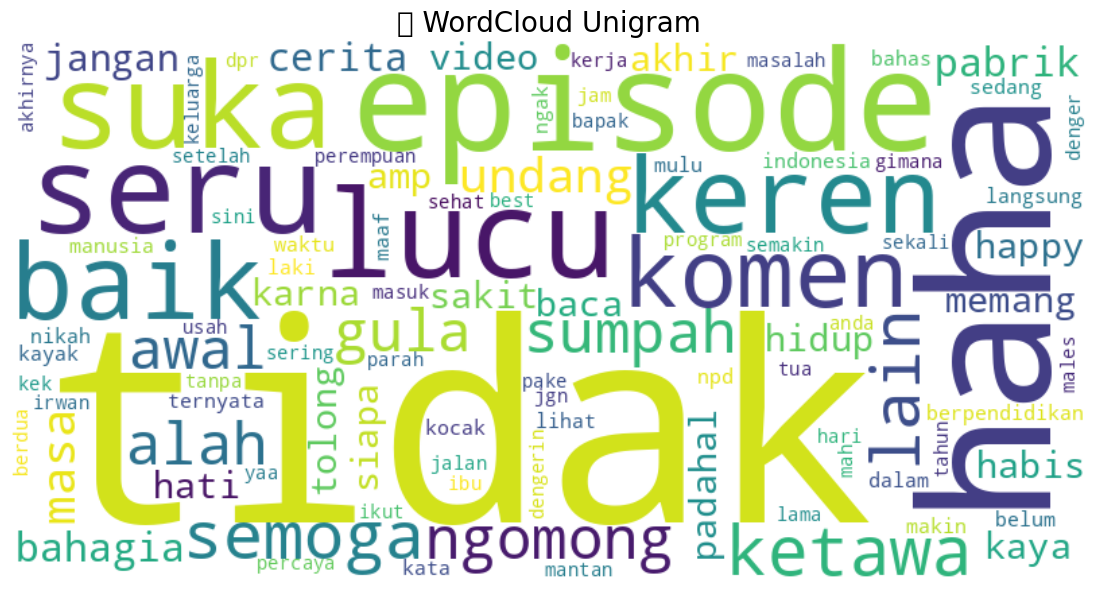

In [19]:
# === 4. Contoh penggunaan WordCloud per n-gram ===
generate_ngram_wordcloud(df['TEXT_FINAL_CLEAN'], n=1, title="🔥 WordCloud Unigram")


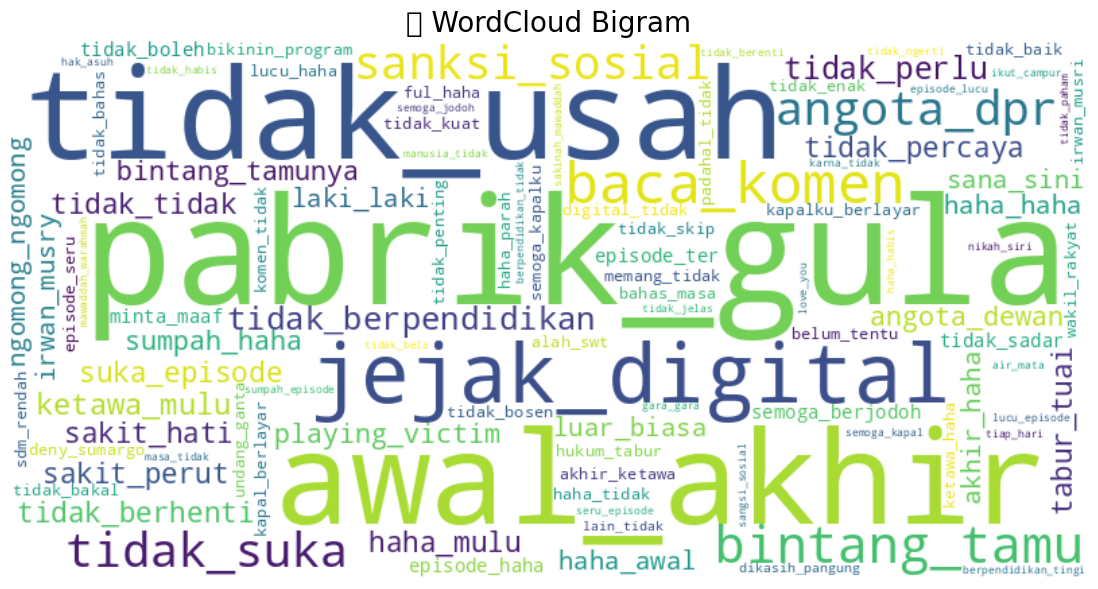

In [20]:
generate_ngram_wordcloud(df['TEXT_FINAL_CLEAN'], n=2, title="🔥 WordCloud Bigram")


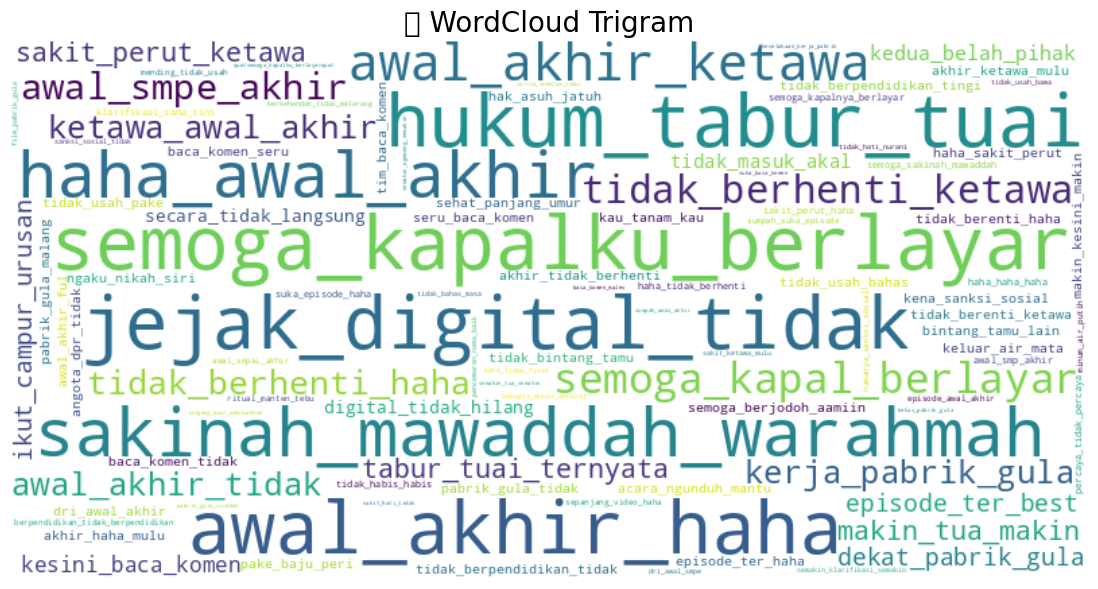

In [21]:
generate_ngram_wordcloud(df['TEXT_FINAL_CLEAN'], n=3, title="🔥 WordCloud Trigram")